In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime, date
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# name of file w/ topic counts
count_file = "allpapers-topics-pca.csv"

In [24]:
# load csv into pandas dataframe

df = pd.read_csv(count_file)
    
# csv has header row in format "Title" then each topic number 0-99
# each subesequent row is in format newspaper title, t00-proportion, t02-proportion etc.
# each row totals the number of articles in corpus of that paper
# each column totals the proportion of that topic in corpus   

In [25]:
# assign 
df_by_title = df.set_index('Title')

In [31]:
# look at topics that have high PMI with that paper. This is defined as:

# PMI(topic, paper) = log P (topic, paper) - log P (topic) - log P (paper)
# variant of : https://github.com/jacobeisenstein/gt-css-class/blob/master/labs/lab6/Lab%206%20-%20Text%20over%20time.ipynb

# PMI functions 

# this computues $p(i)$ where $i$ is a topic
def get_p_topic(df_by_title): 
    df_tot = np.array(df_by_title.sum(axis=0))
    return df_tot / df_by_title.values.sum()

372276.000033557

In [33]:
P_base = get_p_topic(df_by_title)

Text(0,0.5,'proportion')

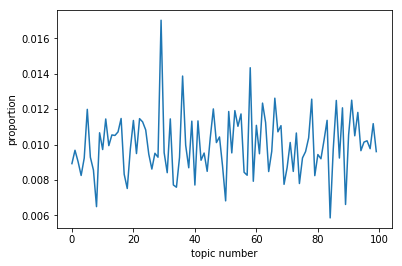

In [35]:
plt.plot(P_base)
plt.xlabel('topic number')
plt.ylabel('proportion')

In [38]:
P_base

array([0.00892085, 0.00967486, 0.00903311, 0.00825375, 0.00923003,
       0.01198359, 0.00928184, 0.00855736, 0.00649379, 0.01066207,
       0.00971555, 0.01144018, 0.00993668, 0.01053923, 0.01051152,
       0.01071135, 0.01146808, 0.0083228 , 0.00751864, 0.00974242,
       0.01135648, 0.0094892 , 0.01145929, 0.01127662, 0.01082314,
       0.00945497, 0.00861391, 0.00950493, 0.00928321, 0.01701171,
       0.00953742, 0.00841002, 0.01144483, 0.0077159 , 0.00758976,
       0.00927569, 0.01386266, 0.00996095, 0.00868777, 0.01131759,
       0.00771335, 0.01133194, 0.00911196, 0.00951823, 0.00848574,
       0.01038266, 0.01200802, 0.01010853, 0.01042696, 0.00877518,
       0.0068206 , 0.01186235, 0.00952629, 0.01191122, 0.01102754,
       0.01172413, 0.00843444, 0.00826619, 0.01433248, 0.00792597,
       0.01108089, 0.00947859, 0.01233584, 0.01123861, 0.00847403,
       0.00961687, 0.01261387, 0.01071497, 0.01106295, 0.00775298,
       0.0086996 , 0.01011364, 0.00848164, 0.01064854, 0.00779

In [43]:
print(P_base.argsort()[::-1]) # topics ranked highest to lowest
print(sorted(P_base)[::-1]) # their scores

[29 58 36 66 78 91 86 62 88 46  5 53 51 93 55 16 22 32 11 83 20 41 39 23
 63 98 60 68 54 24 67 15  9 73 13 90 14 92 48 45 77 82 96 95 71 47 37 12
 97 19 85 10  1 94 65 99 76 30 52 43 27 21 61 25 80 28  6 35 75 87  4 81
 42  2  0 49 70 38 26  7 44 72 64 56 31 17 57  3 79 59 74 69 33 40 34 18
 50 89  8 84]
[0.01701170858920032, 0.014332475272002614, 0.013862656500278856, 0.012613871367387952, 0.01255936952147478, 0.012500710941114962, 0.012486155498651544, 0.012335835491909353, 0.012069045583180216, 0.01200801675184822, 0.011983589450716318, 0.01191121978995502, 0.011862354488779652, 0.01181116568841841, 0.011724125446224235, 0.011468080590401117, 0.011459286166181706, 0.011444830301074864, 0.011440183070732742, 0.011363337015533317, 0.011356475129744891, 0.01133193924811359, 0.011317586230353867, 0.011276620562678202, 0.011238608726307539, 0.0111764511653906, 0.011080885681290651, 0.01106294815100023, 0.011027542104760847, 0.010823138395679036, 0.010714967903962215, 0.010711347331594193

In [44]:
# now compute p(paper) and p(topic,paper)

# LK TO HERE